<a href="https://colab.research.google.com/github/Ander2on/Mis-Proyectos/blob/main/IA_Tienda_Ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Semana 11 Entrenamiento de una IA para el reconocimiento de artículos

In [1]:
#Importar librerias
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow_datasets as tfds
import cv2

In [2]:
#Cargamos el dataset de imagenes para entrenamiento y prueba
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"], dataset["test"]

articulos = ["Ankle boot", "Bag", "Coat", "Dress", "Pullover", "Sandal", "Shirt", "Sneaker", "T-shirt/top", "Trouser"]

#Pasamos en variables los datos de prueba y entrenamiento
numeros_ejemplo_entrenamiento = metadata.splits["train"].num_examples
numeros_ejemplo_prueba = metadata.splits["test"].num_examples
print( numeros_ejemplo_entrenamiento, numeros_ejemplo_prueba )

#Pasamos los numeros (píxeles) de 0 - 255 a 0 - 1
def normalizacion(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

#Llamamos nuestra imagen normalizadora para convertir los numeros de 0 - 255 a 0 - 1
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

#Estructura de a red neuronal
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), #28*28 = 784 neuronas una para cada pixel
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #10 neuronas una para cada numero
])

#Compilamos nuestro modelo
modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Realizamos entrenamiento por lote
batchsize = 32
#ordenado de forma aleatoria
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numeros_ejemplo_entrenamiento).batch(batchsize) 
datos_prueba = datos_prueba.batch(batchsize)

#Entrenamos la red neuronal con los datos de entrenamiento
modelo.fit(datos_entrenamiento, epochs=6,steps_per_epoch=math.ceil(numeros_ejemplo_entrenamiento/batchsize))

#Evaluar el modelo de los datos de prueba 
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(numeros_ejemplo_prueba/batchsize))
print(test_loss*100, test_accuracy*100)

#Graficar la salida para evaluar el aprendizaje.
def graficar_images(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label==true_labels:
    color = "blue"
  else:
    color = "red"
  plt.xlabel("Prediccion: {}".format(articulos[predicted_label]), color=color)

#Convertir las imanes de tensores en matrices con numpy
for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)


#Graficamos las matrices con matplotlib para ver su acierto
def graficar_valores_matrices(i, predictions_array, true_labels):
  predictions_array, true_labels = predictions_array[i], true_labels[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color="#000000")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_labels].set_color("Blue")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteXUOM9V/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteXUOM9V/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
60000 10000
Epoch 1/6
1875/1875 [==============================] - 12s 3ms/step - loss: 0.5074 - accuracy: 0.8220
Epoch 2/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3780 - accuracy: 0.8631
Epoch 3/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3338 - accuracy: 0.8762
Epoch 4/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3205 - accuracy: 0.8822
Epoch 5/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2975 - accuracy: 0.8894
Epoch 6/6
313/313 [==============================] - 1s 4ms/step - loss: 0.3527 - accuracy: 0.8758
35.2682501077652 87.58000135421753


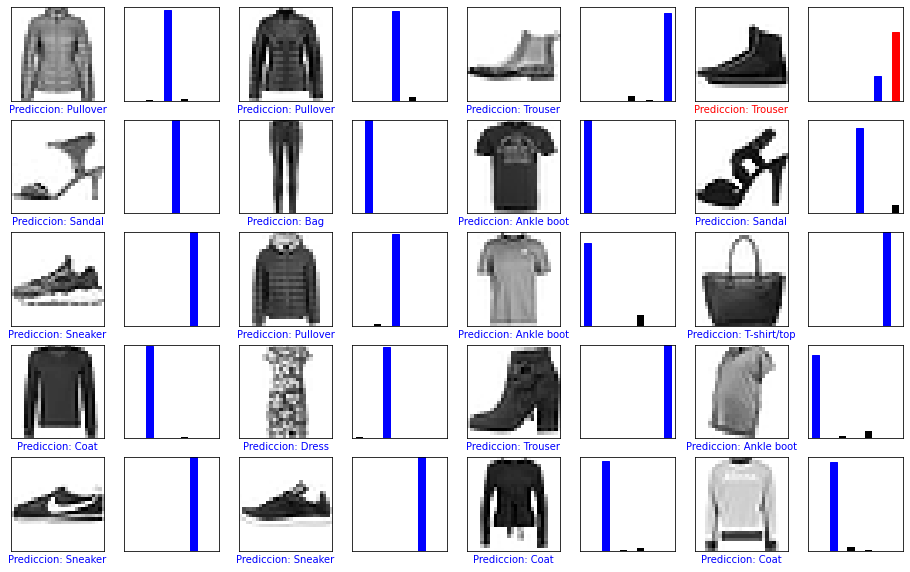

In [3]:
#Llamamos los metodos para la graficacion de las imagenes y la grafica de barras
numfilas = 5
numcols = 4
numimages = numfilas*numcols

plt.figure(figsize=(2*2*numcols, 2*numfilas))
for i in range(numimages):
  plt.subplot(numfilas, 2*numcols, 2*i+1)
  graficar_images(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(numfilas, 2*numcols, 2*i+2)
  graficar_valores_matrices(i, predicciones, etiquetas_prueba)

plt.show()

Introduzca la imagen que quiera evaluar
/content/zapato.jpg
(1, 28, 28)
[[3.0176977e-07 8.2652394e-07 1.3308751e-08 7.8375272e-08 8.5363737e-08
  3.1613400e-03 4.9723607e-08 9.5861197e-01 1.5357379e-06 3.8223844e-02]]


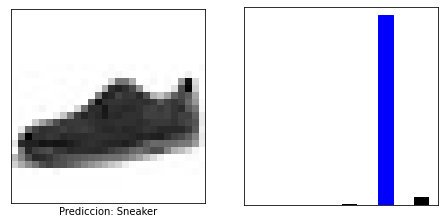

Desea introducir otra imagen?
SI.........1
NO.........2
1
Introduzca la imagen que quiera evaluar
/content/vestido.jpg
(1, 28, 28)
[[1.9025231e-04 9.5015103e-03 6.5509165e-03 6.0079515e-01 3.6913517e-01
  4.4169600e-08 1.0788674e-02 6.6682782e-10 3.0355721e-03 2.6800769e-06]]


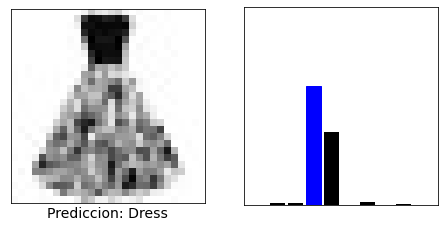

Desea introducir otra imagen?
SI.........1
NO.........2
1
Introduzca la imagen que quiera evaluar
/content/sueter.jpg
(1, 28, 28)
[[1.53791672e-03 5.63722424e-05 1.23852946e-01 5.01303839e-05
  8.16853166e-01 2.23560141e-06 5.68863265e-02 1.15774594e-06
  7.56713736e-04 2.89535751e-06]]


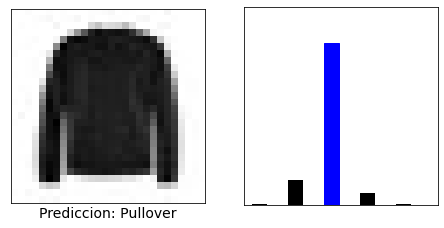

Desea introducir otra imagen?
SI.........1
NO.........2
1
Introduzca la imagen que quiera evaluar
/content/sandalia.jpg
(1, 28, 28)
[[8.37735388e-06 5.02347663e-10 1.42927081e-06 6.98216027e-08
  1.30519466e-05 9.99850392e-01 6.86011344e-06 1.02117474e-05
  1.09626344e-04 6.64179254e-08]]


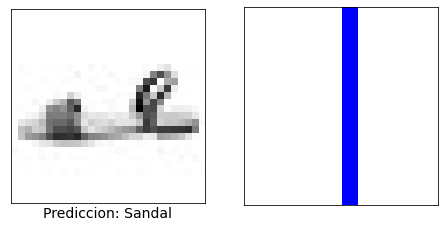

Desea introducir otra imagen?
SI.........1
NO.........2
1
Introduzca la imagen que quiera evaluar
/content/pantalon.jpg
(1, 28, 28)
[[9.2278300e-03 8.8273877e-01 3.4014552e-03 1.0071259e-01 6.1466120e-04
  5.7999507e-05 1.8989497e-03 4.9496095e-05 1.2972987e-03 1.0393954e-06]]


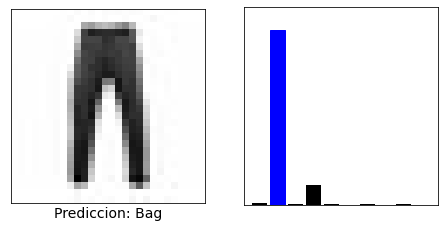

Desea introducir otra imagen?
SI.........1
NO.........2
1
Introduzca la imagen que quiera evaluar
/content/mangalarga.jpg
(1, 28, 28)
[[5.9061451e-03 3.4903345e-04 3.1244535e-02 5.7080803e-03 4.5519421e-01
  4.3926335e-05 4.9895114e-01 7.4962200e-06 2.5598337e-03 3.5600118e-05]]


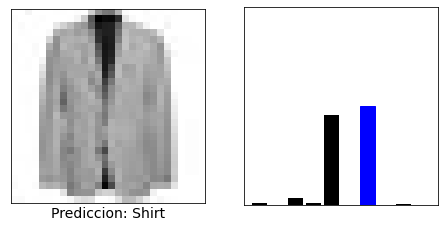

Desea introducir otra imagen?
SI.........1
NO.........2
1
Introduzca la imagen que quiera evaluar
/content/camiseta top.jpg
(1, 28, 28)
[[0.30328912 0.026038   0.10682734 0.11896639 0.07926682 0.00198995
  0.31173837 0.01106899 0.03502265 0.00579243]]


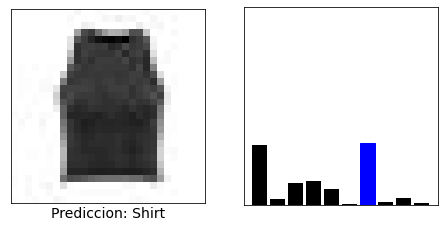

Desea introducir otra imagen?
SI.........1
NO.........2
1
Introduzca la imagen que quiera evaluar
/content/camisa.jpg
(1, 28, 28)
[[0.20569792 0.00710598 0.10850628 0.13399164 0.15585698 0.00046828
  0.37717256 0.00057536 0.0101609  0.00046405]]


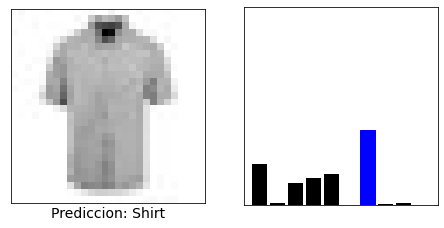

Desea introducir otra imagen?
SI.........1
NO.........2
1
Introduzca la imagen que quiera evaluar
/content/botin.jpg
(1, 28, 28)
[[2.7389513e-02 9.3375314e-07 8.2094697e-03 1.2386150e-05 1.3442655e-02
  4.6530304e-06 6.7258958e-04 3.8860362e-06 9.5026398e-01 5.0211620e-11]]


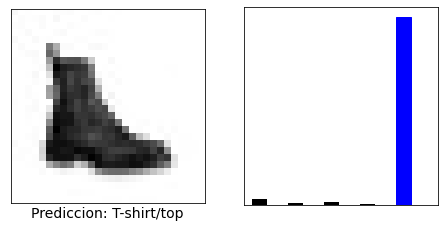

Desea introducir otra imagen?
SI.........1
NO.........2
1
Introduzca la imagen que quiera evaluar
/content/bolso.jpg
(1, 28, 28)
[[8.5479729e-02 2.5263158e-04 1.0300960e-03 2.9573110e-03 1.3548578e-03
  2.9599690e-03 1.0078420e-03 4.7833472e-04 9.0447599e-01 3.2554251e-06]]


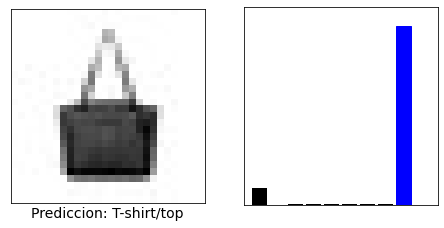

Desea introducir otra imagen?
SI.........1
NO.........2
2


In [4]:
#Hacer pruebas con las imagenes
import cv2

elec = 1
while elec == 1:

  import cv2
  print("Introduzca la imagen que quiera evaluar")
  imagenLocal = input()

  imagenLocal = cv2.imread(imagenLocal, 0)
  imagenLocal = tf.cast(imagenLocal, tf.float32)
  imagenLocal = imagenLocal / 255
  imagenLocal = np.expand_dims(imagenLocal, axis=0)

  print(imagenLocal.shape)

  #Evaluar el modelo de los datos de prueba 
  predic = modelo.predict(imagenLocal, batch_size=1)
  LocalTest = np.argmax(predic)
  print(predic)

  #Graficamos la imagen y la gráfica de barras

  plt.figure(figsize=(16, 8))
  plt.subplot(2, 4, 1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagenLocal[0,...], cmap=plt.cm.binary)
  plt.xlabel("Prediccion: {}".format(articulos[LocalTest]), color='black')

  plt.subplot(2, 4, 2)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predic[0], color='#000000')
  plt.ylim([0,1])
  thisplot[LocalTest].set_color("red")
  thisplot[LocalTest].set_color("blue")
  plt.rcParams['font.size'] = 14
  plt.show()

  print("Desea introducir otra imagen?")
  print("SI.........1")
  print("NO.........2")
  elec = int(input())